In [1]:
# This should be roughly the content of the first code cell


import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

# Plotting support
from matplotlib import pyplot as plt
# from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk
import tensorflow as tf
import time
import os
from skimage import io
import cv2
from scipy import stats

In [2]:
path = 'ICDAR/trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Genuine'
count = 0
genuine_images = []
for filename in os.listdir(path):
    if filename.endswith('.PNG'):
        count += 1
        writer_id, image_id = (filename.rsplit('.', 1)[0].split('_'))
        writer_id = int(writer_id)
        image_id = int(image_id)
        image = np.array(io.imread(path+'/'+filename, plugin='pil', as_gray=True))
        genuine_images.append([writer_id, image_id, np.array(image)])
print('# of images read in:',count)

# of images read in: 239


In [3]:
genuine_np = np.array(genuine_images, dtype='object')
genuine_np = genuine_np[genuine_np[:,0].argsort()]



In [4]:
print("Writer IDs and genuine signature counts")
np.unique(genuine_np[:,0], return_counts=True)

Writer IDs and genuine signature counts


(array([1, 2, 3, 4, 6, 9, 12, 14, 15, 16], dtype=object),
 array([24, 24, 24, 24, 24, 24, 24, 24, 24, 23]))

In [5]:
#Simulated signatures (forgeries) are named according to the
# following conventions: FFFFIII_NN.*, where FFFF is the ID of the
# forger, III is the ID of the reference writer and NN is an index,
# i.e., it is the NNth simulation attempt of writer FFFF to simulate
# the signature of writer III.

path = 'ICDAR/trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Forgeries'
count = 0
forged_images = []
for filename in os.listdir(path):
    if filename.endswith('.png'):
        count += 1
        ids = (filename.rsplit('.', 1)[0])
        forger_id = int(ids[:4])
        signature_id = int(ids[4:7])
        image_id =  int(ids[8:])
        image = np.array(io.imread(path+'/'+filename, plugin='pil', as_gray=True))
        forged_images.append([signature_id, forger_id, image_id, np.array(image)])
print('# of images read in:',count)

# of images read in: 123


In [6]:
forged_np = np.array(forged_images, dtype='object')
forged_np = forged_np[forged_np[:,0].argsort()]



In [7]:
print("Signature IDs and forged signature counts")
np.unique(forged_np[:,0], return_counts=True)


Signature IDs and forged signature counts


(array([1, 2, 3, 4, 6, 9, 12, 14, 15, 16], dtype=object),
 array([ 8, 12, 12, 11, 12, 12, 12, 16, 12, 16]))

In [8]:
## Figure out what shape to adjust to
np.mean([s.shape for s in genuine_np[:,2]], axis=0)

array([248.12133891, 631.43514644])

In [9]:
np.average([s.shape for s in genuine_np[:,2]], axis=0)


array([248.12133891, 631.43514644])

In [10]:
np.max([s.shape for s in genuine_np[:,2]], axis=0)

array([431, 958])

In [11]:
np.min([s.shape for s in genuine_np[:,2]], axis=0)

array([ 83, 229])

#### Let's adjust images to 256 by 512


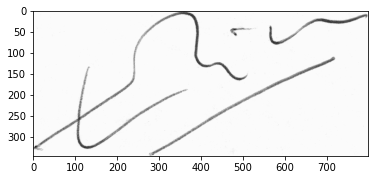

In [12]:
image = genuine_np[0, 2]
plt.imshow(image, cmap='gray')
mode = stats.mode(image, axis=None).mode[0]

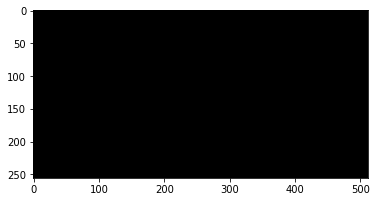

In [13]:
set_height = 256.0
set_width = 512.0
z = np.full((int(set_height), int(set_width)), mode)
plt.imshow(z, cmap='gray')
plt.show()

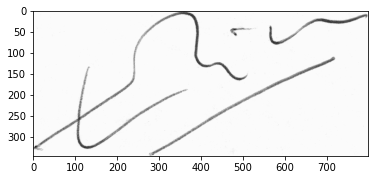

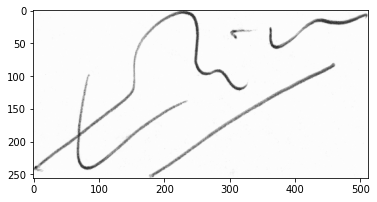

In [14]:
plt.imshow(image, cmap='gray')
plt.show()
# height_ratio =  set_height / image.shape[0]
# width_ratio =  set_width /image.shape[1]
# if np.argmin([height_ratio, width_ratio]) == 0:
#     #keeping height
#     new_height = int(set_height)
#     new_width = int(image.shape[1]*height_ratio)
# else:
#     #keeping width
#     new_height = int(image.shape[0]*width_ratio)
#     new_width = int(set_width)

resized_img = cv2.resize(image, (512, 256))
plt.imshow(resized_img, cmap='gray')



In [15]:
def resize_image(image):
    # mode = stats.mode(image, axis=None).mode[0]
    # set_height = 256.0
    # set_width = 512.0
    # z = np.full((int(set_height), int(set_width)), mode)
    # height_ratio =  set_height / image.shape[0]
    # width_ratio =  set_width /image.shape[1]
    # if np.argmin([height_ratio, width_ratio]) == 0:
    #     #keeping height
    #     new_height = int(set_height)
    #     new_width = int(image.shape[1]*height_ratio)
    # else:
    #     #keeping width
    #     new_height = int(image.shape[0]*width_ratio)
    #     new_width = int(set_width)

    resized_img = cv2.resize(image, (512, 256))

    # for row_in, row in enumerate(resized_img):
    #     for cell_in, cell in enumerate(row):
    #         z[row_in][cell_in] = cell

    return np.array(resized_img)

(431, 908)


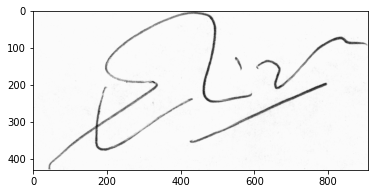

(256, 512)


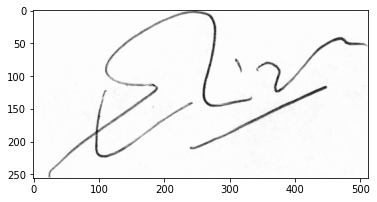

In [16]:
temp = genuine_np[1, 2]
print(temp.shape)
plt.imshow(temp, cmap='gray')
plt.show()

img = resize_image(temp)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

(319, 781)


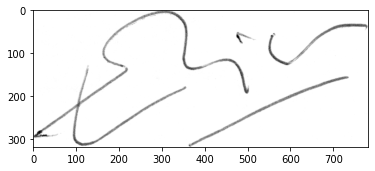

(256, 512)


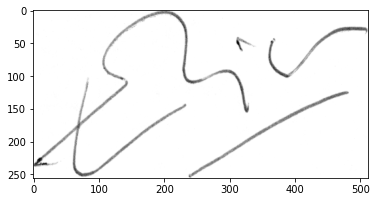

In [17]:
temp = genuine_np[5, 2]
print(temp.shape)
plt.imshow(temp, cmap='gray')
plt.show()

img = resize_image(temp)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()


(398, 777)


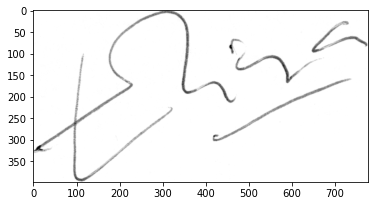

(256, 512)


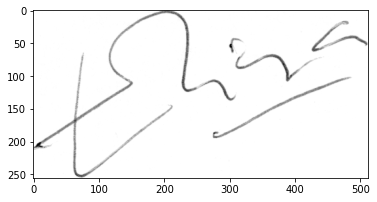

In [18]:
temp = genuine_np[10, 2]
print(temp.shape)
plt.imshow(temp, cmap='gray')
plt.show()

img = resize_image(temp)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()


In [19]:
genuine_data = []
for row in genuine_np:
    temp = resize_image(row[2])
    genuine_data.append((temp))
genuine_data = np.array(genuine_data)


In [20]:
forged_data = []
for row in forged_np:
    temp = resize_image(row[3])
    forged_data.append(temp)
forged_data = np.array(forged_data)

In [21]:
genuine_data.shape, forged_data.shape


((239, 256, 512), (123, 256, 512))

In [22]:
np.save('training/genuine_data.npy', genuine_data)
np.save('training/forged_data.npy', forged_data)


In [23]:
genuine_labels = np.array(genuine_np[:,0], dtype=int)

In [24]:
forged_labels = np.array(forged_np[:, 0], dtype=int)

In [25]:
np.save('training/genuine_labels.npy', genuine_labels)
np.save('training/forged_labels.npy', forged_labels)